In [28]:
!git clone https://github.com/ltt14/PRODIGY_ML_04

fatal: destination path 'PRODIGY_ML_04' already exists and is not an empty directory.


In [1]:
!pip install -g kaggle
!mkdir ~/.kaggle
!cp kaggle.json
!kaggle datasets download -d gti-upm/leapgestrecog
!unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from tensorflow.keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
path = "./leapGestRecog"
folders = os.listdir(path)
inner_folders = os.listdir(path+"/01")
categories=[]
for i in inner_folders:
  category = i.split('_', maxsplit=1)[1:]
  categories.append(category[0])
num_classes = len(categories)
categories

['thumb',
 'l',
 'down',
 'palm_moved',
 'palm',
 'fist',
 'fist_moved',
 'index',
 'c',
 'ok']

In [4]:
df = pd.DataFrame(columns=['filepaths','categories'])
paths , category = [], []
for folder in folders:
  inner_folders = os.listdir(path+'/'+folder)
  for inner_f in inner_folders:
    files = os.listdir(path+'/'+folder+"/"+inner_f)
    for file in files:
      paths.append(folder+'/'+inner_f+'/'+file)
      category.append(inner_f.split('_', maxsplit=1)[1])
df['filepaths'] = paths
df['categories'] = category

In [5]:
im_size = (224, 224)
im_width, im_height = im_size
im_channels=1
batch_size = 50

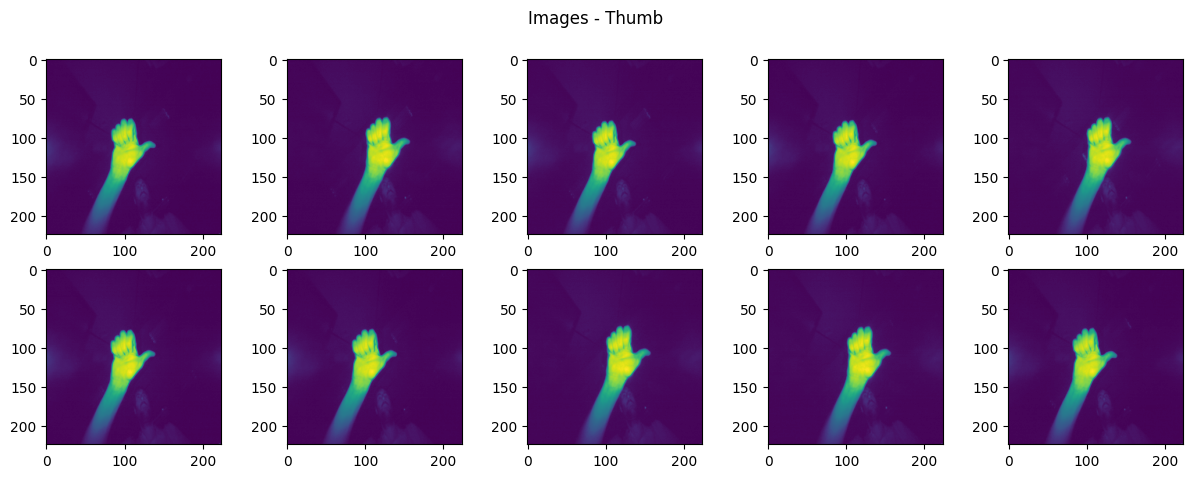

In [15]:
fig = plt.figure(figsize=(15,5))
fig.suptitle("Images - Thumb")

for i in range(10):
  img = Image.open(path+'/'+df['filepaths'][i])
  img = img.resize(im_size)
  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  # print(img.shape)
plt.show()

In [7]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=123)
train_df[:5]

,filepaths,categories
9642,04/09_c/frame_04_09_0081.png,c
17924,00/07_ok/frame_00_07_0088.png,ok
1642,03/09_c/frame_03_09_0181.png,c
9670,04/09_c/frame_04_09_0102.png,c
16860,00/01_palm/frame_00_01_0067.png,palm


In [8]:
train_datagen = ImageDataGenerator(rescale=1/.255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=40)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    path+'/',
    x_col='filepaths',
    y_col='categories',
    target_size = im_size,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    classes=categories)

Found 16000 validated image filenames belonging to 10 classes.


In [9]:
val_datagen = ImageDataGenerator(rescale=1/.255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    path+'/',
    x_col='filepaths',
    y_col='categories',
    target_size = im_size,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    classes=categories
)

Found 2000 validated image filenames belonging to 10 classes.


In [10]:
val_datagen = ImageDataGenerator(rescale=1/.255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    path+'/',
    x_col='filepaths',
    y_col='categories',
    target_size = im_size,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    classes=categories
)

Found 2000 validated image filenames belonging to 10 classes.


In [11]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 2, verbose = 1, factor = 0.5, min_lr = 0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from tensorflow.keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# ... (rest of your existing code) ...

# Define the Keras model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(im_width, im_height, im_channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # num_classes should match the number of categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ... (rest of your existing code, including the model.fit call) ...

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model_hist = model.fit(
    train_generator,
    validation_data = val_generator,
    steps_per_epoch=100,
    epochs=100,
    callbacks=callbacks
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 363ms/step - accuracy: 0.1230 - loss: 60.3837 - val_accuracy: 0.2315 - val_loss: 2.1928 - learning_rate: 0.0010
Epoch 2/100
  2/100 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.1350 - loss: 2.2827

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 343ms/step - accuracy: 0.1876 - loss: 2.2285 - val_accuracy: 0.2525 - val_loss: 2.0871 - learning_rate: 0.0010
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 327ms/step - accuracy: 0.2004 - loss: 2.1539 - val_accuracy: 0.2645 - val_loss: 1.9673 - learning_rate: 0.0010
Epoch 4/100
 20/100 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - accuracy: 0.1934 - loss: 2.1115

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.2019 - loss: 2.1224 - val_accuracy: 0.2560 - val_loss: 2.0272 - learning_rate: 0.0010
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 333ms/step - accuracy: 0.2309 - loss: 2.0753 - val_accuracy: 0.2765 - val_loss: 1.9298 - learning_rate: 0.0010
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 346ms/step - accuracy: 0.2162 - loss: 2.0786 - val_accuracy: 0.2940 - val_loss: 1.8977 - learning_rate: 0.0010
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - accuracy: 0.2188 - loss: 2.0622 - val_accuracy: 0.2500 - val_loss: 1.9314 - learning_rate: 0.0010
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.2329 - loss: 2.0179 - val_accuracy: 0.2680 - val_loss: 1.9503 - learning_rate: 0.0010
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 344ms/step - accuracy: 0.2393 - loss: 2.0360 - val_accuracy: 0.2610 - val_loss: 1.9009 - learning_rate: 0.0010
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 0.2419 - lo

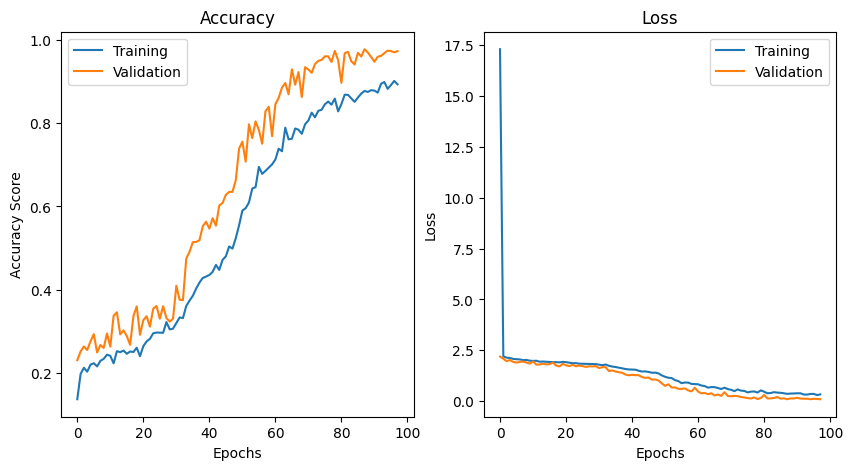

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(model_hist.history.get('acc', model_hist.history.get('accuracy')), label='Training') # Try 'acc' first, then 'accuracy'
plt.plot(model_hist.history.get('val_acc', model_hist.history.get('val_accuracy')), label='Validation') # Try 'val_acc' first, then 'val_accuracy'
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Score")
plt.legend()

plt.subplot(1,2,2)
plt.plot(model_hist.history['loss'], label='Training')
plt.plot(model_hist.history['val_loss'], label='Validation')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.savefig("Training History.jpg")
plt.show()

In [18]:
model.save('hand_gesture_recognition.h5')

In [19]:
basic_test_generator = train_datagen.flow_from_dataframe(
    test_df,
    path+'/',
    x_col='filepaths',
    y_col='categories',
    target_size = im_size,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    classes=categories
)

Found 2000 validated image filenames belonging to 10 classes.


In [20]:
loss, acc = model.evaluate(basic_test_generator)
print("Testing Loss:", loss)
print("Testing Accuracy:", acc)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - acc: 0.9363 - loss: 0.2059
Testing Loss: 0.19137080013751984
Testing Accuracy: 0.9409999847412109


In [21]:
from PIL import Image

In [22]:
test_df[40:48]

,filepaths,categories
4662,08/08_palm_moved/frame_08_08_0181.png,palm_moved
13352,06/04_fist_moved/frame_06_04_0176.png,fist_moved
13647,06/09_c/frame_06_09_0008.png,c
5615,08/09_c/frame_08_09_0021.png,c
17957,00/07_ok/frame_00_07_0032.png,ok
15652,09/09_c/frame_09_09_0083.png,c
9179,04/03_fist/frame_04_03_0167.png,fist
5668,08/09_c/frame_08_09_0100.png,c


In [23]:
sample_imgs=[]
for img_paths in test_df[100:108]['filepaths']:
  img = Image.open(path+'/'+img_paths)
  img = img.resize(im_size)
  img = img.convert('L')
  img = np.array(img)
  img = img.reshape((img.shape[0], img.shape[1], 1))
  sample_imgs.append(img)
sample_imgs = np.array(sample_imgs)
sample_imgs.shape

(8, 224, 224, 1)

In [24]:
preds = model.predict(sample_imgs)
preds = np.argmax(preds, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


In [25]:
preds

array([3, 3, 3, 8, 4, 9, 2, 4])

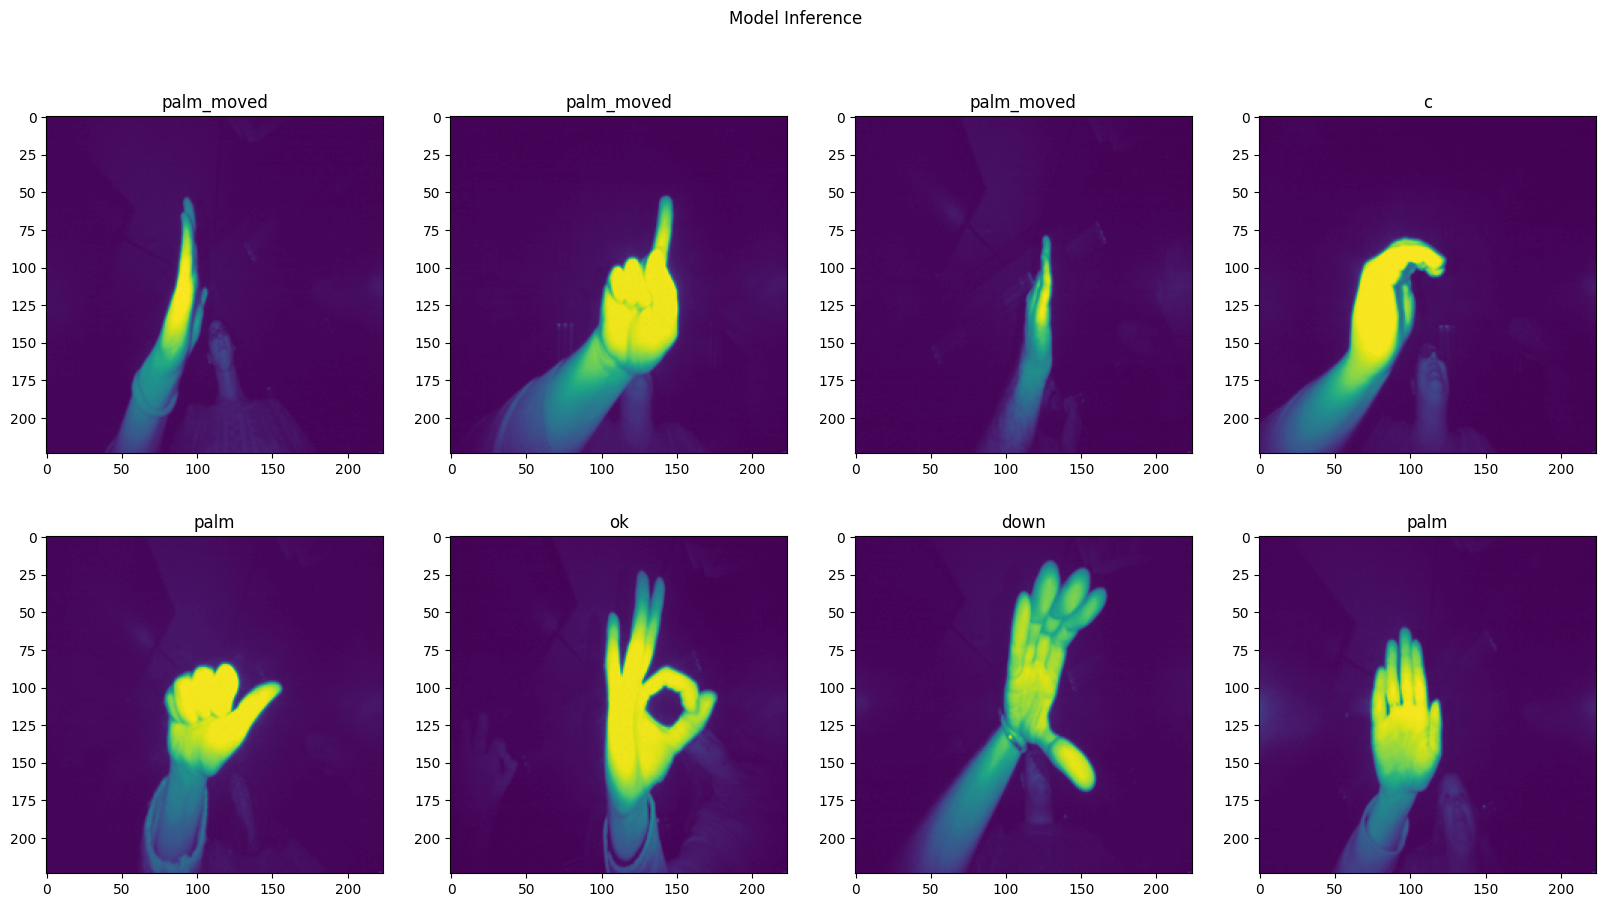

In [26]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Model Inference")
ind=1
for img in sample_imgs:
  plt.subplot(2,4,ind)
  plt.imshow(img)
  plt.title(categories[preds[ind-1]])
  ind+=1
plt.savefig("Hand Gesture model Inference.jpg")
plt.show()